<a href="https://colab.research.google.com/github/y1shubham/Ml_Intern_Pro/blob/main/Athravo_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

# Data Loading


In [7]:
poker_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/poker_hand_test.csv')
poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


# Data Preprosessing and Analysis

In [8]:
labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

X = poker_df.iloc[:, 0:9]
y = poker_df.hand

# Visualization - Class Balance Check

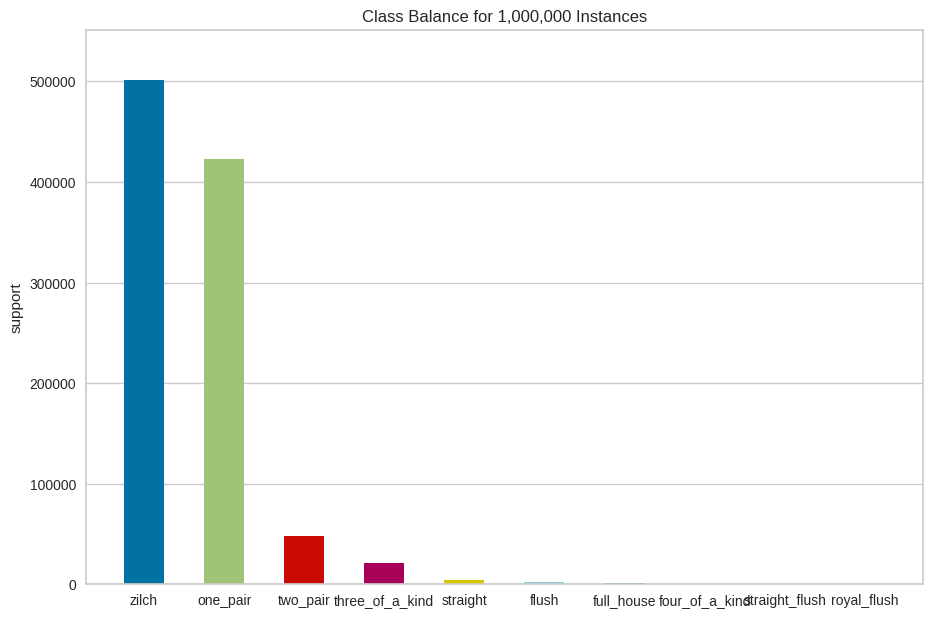

<Axes: title={'center': 'Class Balance for 1,000,000 Instances'}, ylabel='support'>

In [9]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

# Class Imbalance present require up-sampling from Minority


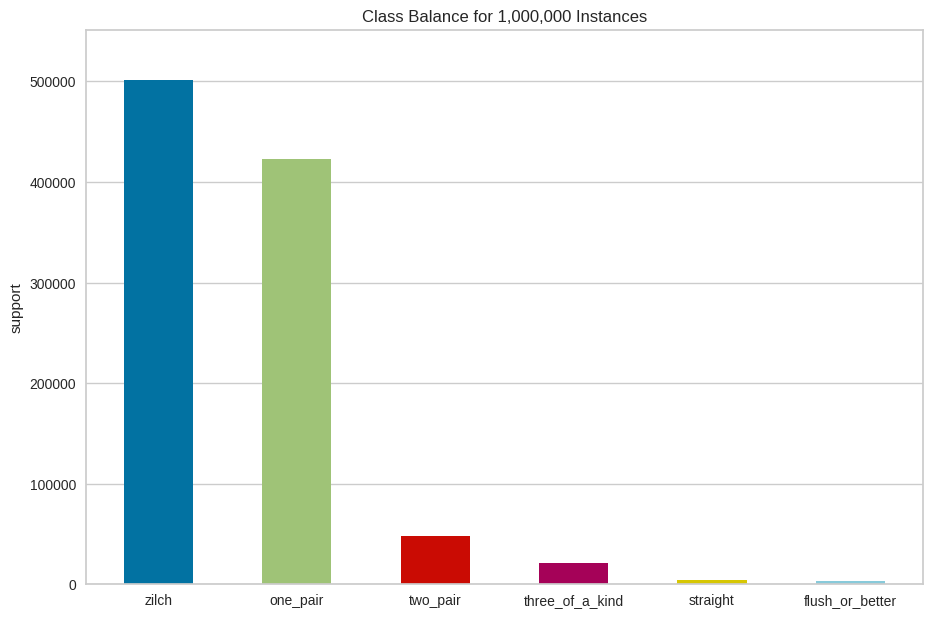

<Axes: title={'center': 'Class Balance for 1,000,000 Instances'}, ylabel='support'>

In [10]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

# Training using Random Forest Classifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

# Evaluation - accuracy


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

# Curves

In [ ]:
from yellowbrick.classifier import ROCAUC

rocauc = ROCAUC(CLF, size =(1080, 720), classes = labels)

rocauc.score(X_test, y_test)
rocauc.show()

# HeatMap

In [ ]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show(

# Class Prediction Error


In [ ]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()